# Get meteo data #

In [3]:
import sys
sys.path.append('../../../pycequeau')
from src.physiographic.base import Basin
from src.meteo.meteo_netcdf import StationNetCDF
import matplotlib.pyplot as plt
import os

In [5]:
project_folder = "/home/erinconv/01-PhD/River"
bassinVersant_file = "/home/erinconv/01-PhD/River/results/bassinVersant.json"
files_list = ["Dem1.tif",
              "FAC_grass.tif",
              "LC_grass2.tif",
              "Watershed_GRASS.shp",
              "sub_basins_grass_clip.shp",
              "WaterBodies.shp",
              "WaterBodies.shp"]


# Create the project folder structure.
# 1- Select folder where the meteo data is stored
# project_folder = "path/to/your/project/"
# # 2- Select the bassinVersant json file for this basin
# bassinVersant_file = "path/to/your/project/results/bassinVersant.json"
# # 3- File list with all the raster and shapes
# files_list = ["DEM.tif",  # DEM file
#               "FAC.tif",  # Flow accumulation file
#               "LC.tif",  # Land cover file
#               "Watershed.shp",  # Watershed shp file
#               "CAT.shp",  # Sub basins shp file
#               "WaterBodies.shp",  # Waterbodies as shp file
#               "Wetlands.shp"]  # Wetlands locations as shp file
# 4- Create basin Object:
basin = Basin(project_folder,
                "Melezes",
                files_list,
                bassinVersant_file)
# 5- Create the Meteo data object
MeteoStations = StationNetCDF.charge_ERA_Meteo(basin,
                                                os.path.join(project_folder,"meteo","ERA"))
# 6- Do the interpolation
dsi = MeteoStations.interpolation("nearest")
# 7- Construct the meteo structure for CEQUEAU
grid_CEQUEAU = MeteoStations.cequeau_grid(dsi,basin)
# 8- Save the netcdf with the meteo data
grid_CEQUEAU.to_netcdf(os.path.join(project_folder,"meteo","meteo_cequeau.nc"))

In [6]:
dsi

<xarray.Dataset>
Dimensions:      (i: 33, j: 41, time: 15341)
Coordinates:
  * i            (i) int8 10 11 12 13 14 15 16 17 18 ... 35 36 37 38 39 40 41 43
  * j            (j) int8 10 11 12 13 14 15 16 17 18 ... 43 44 45 46 47 48 49 51
  * time         (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
Data variables:
    pTot         (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    nebulosite   (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    tMax         (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    tMin         (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    vitesseVent  (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    pression     (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    rayonnement  (time, j, i) float64 nan nan nan nan nan ... nan nan nan nan
    CE           (j, i) float16 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    interpolated:  Interpolated using the method: nearest from xr.Dataset.int...

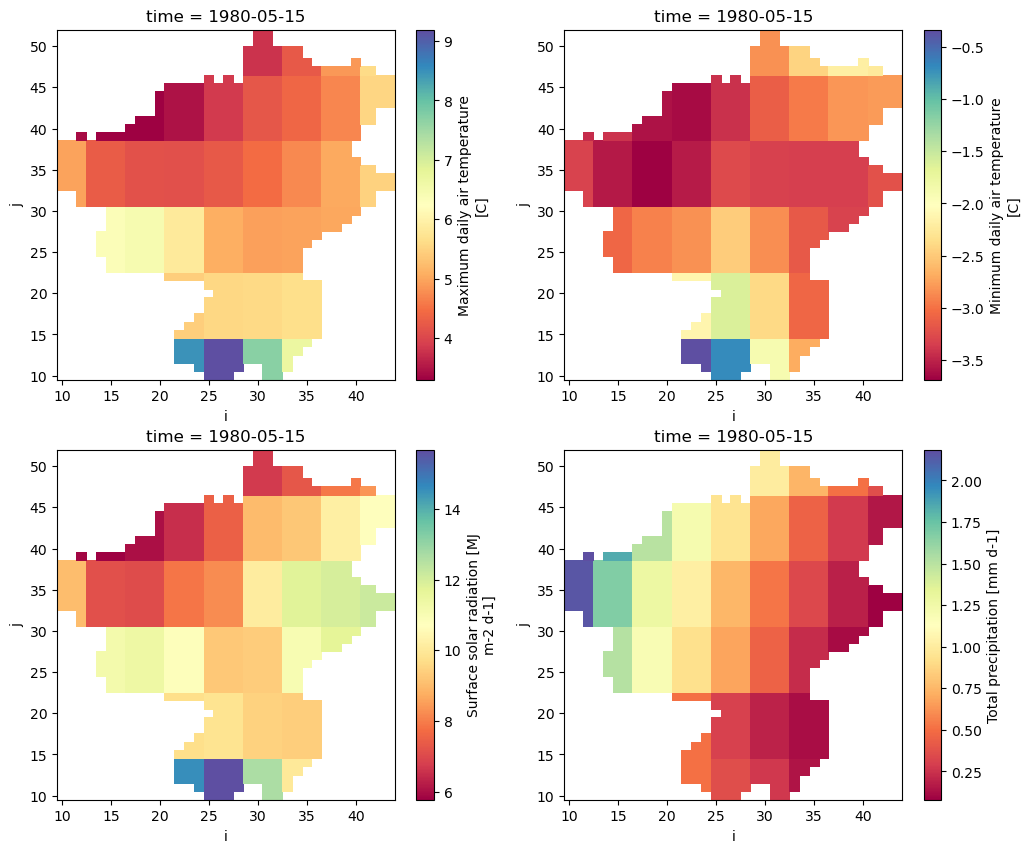

In [6]:
dsi = dsi.isel(time=500)
fig, axes = plt.subplots(ncols=2,
                        nrows=2,
                        figsize=(12, 10))
dsi["tMax"].plot(ax=axes[0,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["tMin"].plot(ax=axes[0,1], cmap='Spectral')
dsi["rayonnement"].plot(ax=axes[1,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["pTot"].plot(ax=axes[1,1], cmap='Spectral')